In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz 
import matplotlib.pyplot as plt
from IPython.display import Image
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [2]:
data = pd.read_csv("data/winequality.csv")
print(data.shape)
X = data.iloc[:,:11]
y = data.iloc[:,11]
train_X,test_X,train_y,test_y = train_test_split(X, y, random_state=0, test_size=0.1)
train_X,val_X,train_y,val_y = train_test_split(X, y, random_state=0, test_size=0.1)
features = list(train_X.columns.values)
 

(3918, 13)


In [16]:
accuracy_dict = dict()
taccuracy_dict = dict()
best_accuracy = 0
best_info = (None,None,None)
for d in [5,8,10,13,15]:
    accuracy_dict[d] = list()
    taccuracy_dict[d] = list()
    for ne in range(40,70):
        clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion = "gini", random_state = 0,
                               max_depth=d), n_estimators=ne, random_state=0)
        clf.fit(train_X,train_y)
        tpredict = clf.predict(train_X)
        taccuracy = accuracy_score(tpredict,train_y)
        val_accuracy = cross_val_score(clf, train_X,train_y, cv=3).mean()
        accuracy_dict[d].append(val_accuracy)
        taccuracy_dict[d].append(taccuracy)
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_info = (d,ne,val_accuracy)
        print("max depth: ",d," max num of estimator: ",ne," accuracy: ",val_accuracy)

max depth:  5  max num of estimator:  40  accuracy:  0.485248453195
max depth:  5  max num of estimator:  41  accuracy:  0.486668098658
max depth:  5  max num of estimator:  42  accuracy:  0.485814624566
max depth:  5  max num of estimator:  43  accuracy:  0.490355803974
max depth:  5  max num of estimator:  44  accuracy:  0.487235961525
max depth:  5  max num of estimator:  45  accuracy:  0.491490079854
max depth:  5  max num of estimator:  46  accuracy:  0.490642630802
max depth:  5  max num of estimator:  47  accuracy:  0.498591935501
max depth:  5  max num of estimator:  48  accuracy:  0.500006272227
max depth:  5  max num of estimator:  49  accuracy:  0.499722345105
max depth:  5  max num of estimator:  50  accuracy:  0.493483853635
max depth:  5  max num of estimator:  51  accuracy:  0.500851064446
max depth:  5  max num of estimator:  52  accuracy:  0.505108077554
max depth:  5  max num of estimator:  53  accuracy:  0.505101082248
max depth:  5  max num of estimator:  54  accura

max depth:  15  max num of estimator:  40  accuracy:  0.631591527491
max depth:  15  max num of estimator:  41  accuracy:  0.633861998837
max depth:  15  max num of estimator:  42  accuracy:  0.632442348446
max depth:  15  max num of estimator:  43  accuracy:  0.63329123996
max depth:  15  max num of estimator:  44  accuracy:  0.631591041743
max depth:  15  max num of estimator:  45  accuracy:  0.63187521297
max depth:  15  max num of estimator:  46  accuracy:  0.633292206529
max depth:  15  max num of estimator:  47  accuracy:  0.633012619112
max depth:  15  max num of estimator:  48  accuracy:  0.634999403747
max depth:  15  max num of estimator:  49  accuracy:  0.633581926904
max depth:  15  max num of estimator:  50  accuracy:  0.63301792785
max depth:  15  max num of estimator:  51  accuracy:  0.632447897594
max depth:  15  max num of estimator:  52  accuracy:  0.632158902145
max depth:  15  max num of estimator:  53  accuracy:  0.632728209938
max depth:  15  max num of estimator:

In [17]:
print(best_info)


(15, 66, 0.63925424330735536)


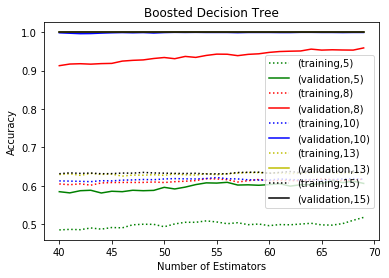

In [18]:
plt.title("Boosted Decision Tree")
plt.plot(list(range(40,70)),accuracy_dict[5],"g:",label="(training,5)")
plt.plot(list(range(40,70)),taccuracy_dict[5],"g-",label="(validation,5)")
plt.plot(list(range(40,70)),accuracy_dict[8],"r:",label="(training,8)")
plt.plot(list(range(40,70)),taccuracy_dict[8],"r-",label="(validation,8)")
plt.plot(list(range(40,70)),accuracy_dict[10],"b:",label="(training,10)")
plt.plot(list(range(40,70)),taccuracy_dict[10],"b-",label="(validation,10)")
plt.plot(list(range(40,70)),accuracy_dict[13],"y:",label="(training,13)")
plt.plot(list(range(40,70)),taccuracy_dict[13],"y-",label="(validation,13)")
plt.plot(list(range(40,70)),accuracy_dict[15],"k:",label="(training,15)")
plt.plot(list(range(40,70)),taccuracy_dict[15],"k-",label="(validation,15)")
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.savefig('Boosting_wine_1.png')
plt.show()

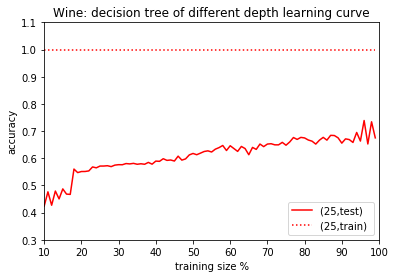

In [21]:
deep_grow_accuracy = list()
train_1 = list()
for p in range(10,100):
    train_X,test_X,train_y,test_y = train_test_split(X, y, random_state=0, test_size= 1-p/100)
    
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion = "gini", random_state = 0,
                               max_depth=15), n_estimators=66, random_state=0)
    clf.fit(train_X,train_y)
    deep_gini_predict = clf.predict(test_X)
    deep_g_accuracy = accuracy_score(deep_gini_predict,test_y) 
    deep_grow_accuracy.append(deep_g_accuracy)
    tdeep_gini_predict = clf.predict(train_X)
    tdeep_g_accuracy = accuracy_score(tdeep_gini_predict,train_y) 
    train_1.append(tdeep_g_accuracy)

plt.plot(range(10,100),deep_grow_accuracy,'r-',label="(25,test) ")
plt.plot(range(10,100),train_1,'r:',label="(25,train) ")

plt.xlabel('training size %')
plt.ylabel('accuracy')
plt.title('Wine: decision tree of different depth learning curve')
plt.axis([10,100,0.3, 1.1])
plt.legend()
plt.savefig("Boosted_DT_wine_2.jpg")
plt.show()

In [26]:
train_X,test_X,train_y,test_y = train_test_split(X, y, random_state=0, test_size= 0.2)
start = time.clock()
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion = "gini", random_state = 0,
                               max_depth=best_info[0]), n_estimators=best_info[1])
model.fit(train_X,train_y)
predict = model.predict(test_X)
elapsed = (time.clock() - start)
print("boosted decision tree model accuracy: ",accuracy_score(predict,test_y),"time used : ",elapsed)

boosted decision tree model accuracy:  0.676020408163 time used :  1.4272300000000087
